# Exemplo de Análise de dados - Dengue entre 2010 - 2019


## O presente notebook tem propósito didático e se destina ao ensino de rotinas em Python para a análise de dados.

> O dataset utilizado neste notebook se encontra em Rachel Lowe. (2021). Data and R code to accompany 'Combined effects of hydrometeorological hazards and urbanisation on dengue risk in Brazil: a spatiotemporal modelling study' (Version v1.0.0). Zenodo. http://doi.org/10.5281/zenodo.4632205

> Repositório do estudo original: https://github.com/drrachellowe/hydromet_dengue/tree/main

> Link para o artigo publicado https://www.thelancet.com/journals/lanplh/article/PIIS2542-5196(20)30292-8/fulltext#:~:text=The%20dataset%20included%2012%20895,22%E2%80%931%C2%B767%5D


### Bibliotecas importantes para análise de dados

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

### Dataset sobre casos de dengue nas cidades brasileiras

In [2]:
df = pd.read_csv('data_2000_2019.csv')
df

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,52015,Meia Ponte,MEIA PONTE,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,111.0,409691.0,19.397264,31.148733,21.699646,-2.526940,89.69,79.10,0.4656
133916,52016,Pires do Rio,PIRES DO RIO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,42.0,100780.0,10.579541,29.929796,20.871635,-1.855514,72.80,71.34,0.2444
133917,52017,Catal<e3>o,CATALÃO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,57.0,176527.0,11.591627,30.154041,20.992001,-2.663716,89.47,88.74,0.6508
133918,52018,Quirin<f3>polis,QUIRINÓPOLIS,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,41.0,128463.0,7.991280,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


In [3]:
df.columns

Index(['micro_code', 'micro_name', 'micro_name_ibge', 'meso_code', 'meso_name',
       'state_code', 'state_name', 'region_code', 'region_name', 'biome_code',
       'biome_name', 'ecozone_code', 'ecozone_name', 'main_climate', 'month',
       'year', 'time', 'dengue_cases', 'population', 'pop_density', 'tmax',
       'tmin', 'pdsi', 'urban', 'water_network', 'water_shortage'],
      dtype='object')

In [14]:
len(df['micro_code'].unique())

558

In [26]:
df[df['micro_name_ibge'].str.contains('RIO DE JANEIRO')]['pop_density'].unique()

array([          nan, 2368.5211637 , 2393.59970653, 2415.7826455 ,
       2462.35102713, 2488.12135246, 2513.70017482, 2488.68619836,
       2537.60576201, 2555.05603028, 2548.46784521, 2563.30932483,
       2578.30673004, 2595.64499543, 2606.37992242, 2616.74787526,
       2626.80287888, 2636.44962103, 2704.95695105, 2718.0975242 ])

### Analisando a relação climática com os casos de dengue

In [27]:
columns_of_interest = ['dengue_cases', 'tmax', 'tmin', 'pdsi']
df_climate = df[columns_of_interest]

# Calcular a correlação entre as variáveis climáticas e os casos de dengue
correlation = df_climate.corr()
print(correlation)

              dengue_cases      tmax      tmin      pdsi
dengue_cases      1.000000  0.008787  0.021136  0.003217
tmax              0.008787  1.000000  0.858772 -0.155102
tmin              0.021136  0.858772  1.000000 -0.112178
pdsi              0.003217 -0.155102 -0.112178  1.000000


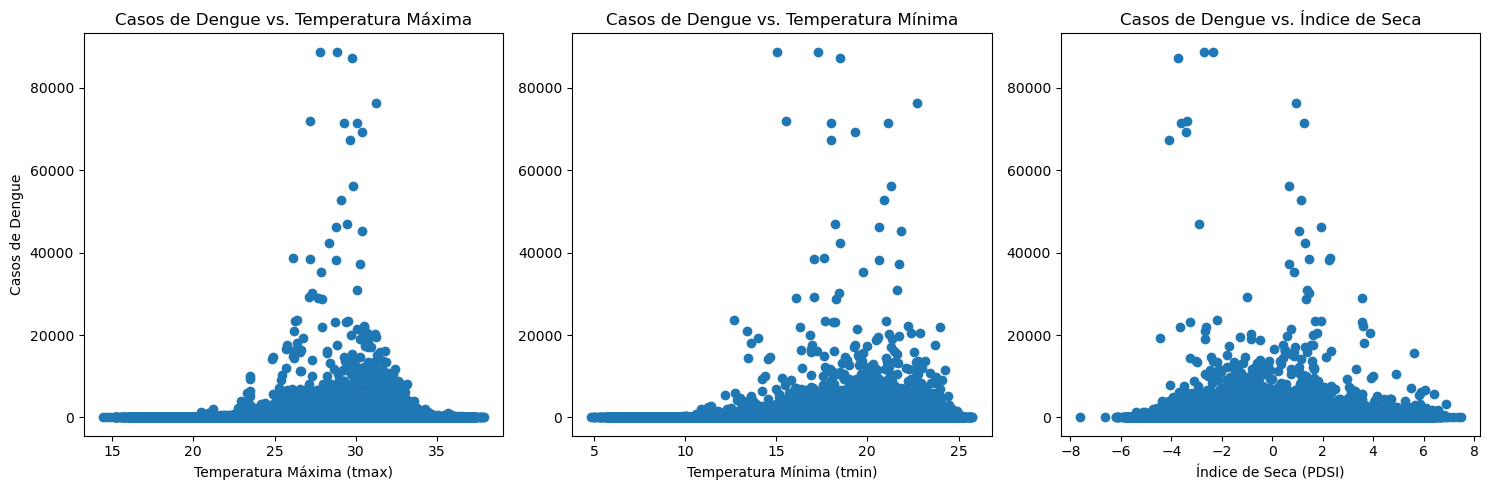

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['tmax'], df['dengue_cases'])
axes[0].set_xlabel('Temperatura Máxima (tmax)')
axes[0].set_ylabel('Casos de Dengue')
axes[0].set_title('Casos de Dengue vs. Temperatura Máxima')

axes[1].scatter(df['tmin'], df['dengue_cases'])
axes[1].set_xlabel('Temperatura Mínima (tmin)')
axes[1].set_title('Casos de Dengue vs. Temperatura Mínima')

axes[2].scatter(df['pdsi'], df['dengue_cases'])
axes[2].set_xlabel('Índice de Seca (PDSI)')
axes[2].set_title('Casos de Dengue vs. Índice de Seca')

plt.tight_layout()
plt.show()

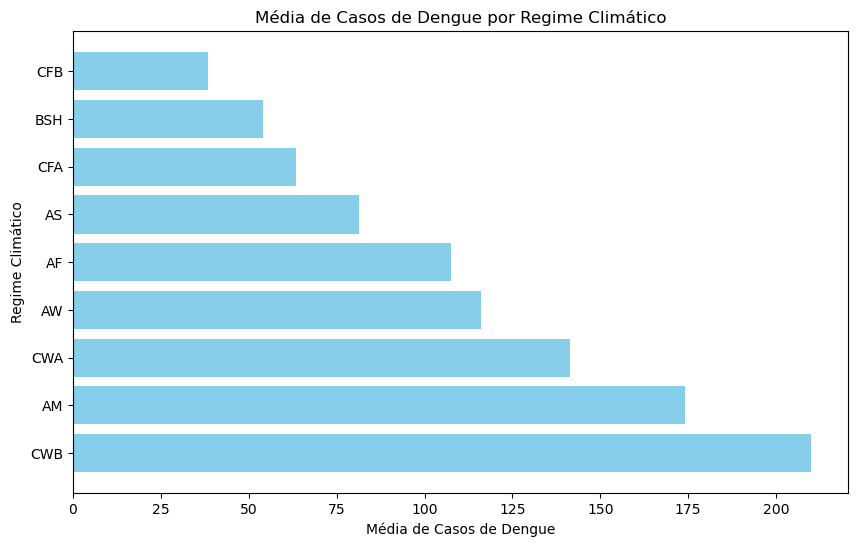

In [33]:
climate_dengue = df.groupby('main_climate')['dengue_cases'].mean().reset_index()

# Ordenar os dados para melhor visualização
climate_dengue = climate_dengue.sort_values(by='dengue_cases', ascending=False)

# Visualizar os resultados usando um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(climate_dengue['main_climate'], climate_dengue['dengue_cases'], color='skyblue')
plt.xlabel('Média de Casos de Dengue')
plt.ylabel('Regime Climático')
plt.title('Média de Casos de Dengue por Regime Climático')
plt.show()

<Figure size 1200x800 with 0 Axes>

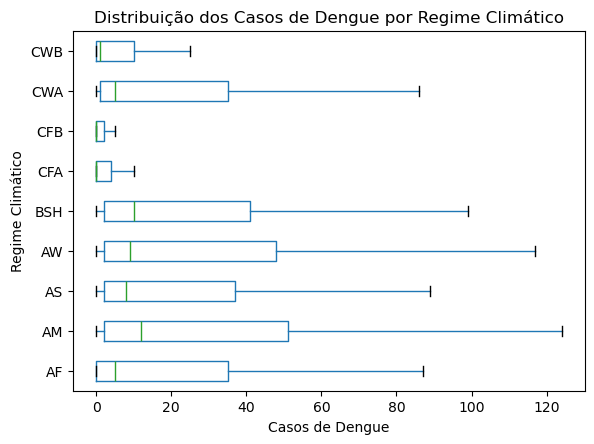

In [38]:
plt.figure(figsize=(12, 8))
df.boxplot(column='dengue_cases', by='main_climate', grid=False, vert=False, showfliers=False)
plt.title('Distribuição dos Casos de Dengue por Regime Climático')
plt.suptitle('')  # Remove o título automático
plt.xlabel('Casos de Dengue')
plt.ylabel('Regime Climático')
plt.show()

### Impacto da urbanização

In [31]:
columns_of_interest_urban = ['dengue_cases', 'urban', 'pop_density']
df_urban = df[columns_of_interest_urban]

# Calcular a correlação entre a urbanização e os casos de dengue
correlation_urban = df_urban.corr()
print(correlation_urban)

              dengue_cases     urban  pop_density
dengue_cases      1.000000  0.099719     0.150179
urban             0.099719  1.000000     0.295453
pop_density       0.150179  0.295453     1.000000


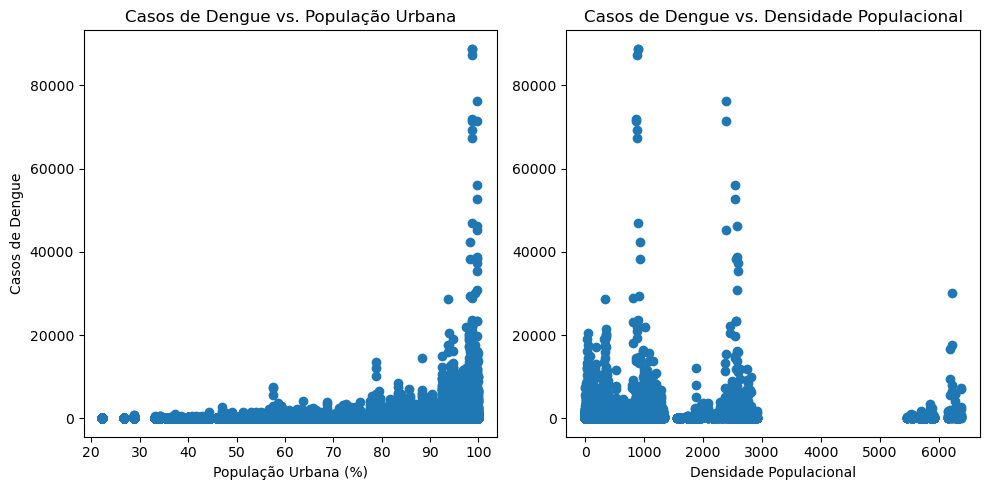

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(df['urban'], df['dengue_cases'])
axes[0].set_xlabel('População Urbana (%)')
axes[0].set_ylabel('Casos de Dengue')
axes[0].set_title('Casos de Dengue vs. População Urbana')

axes[1].scatter(df['pop_density'], df['dengue_cases'])
axes[1].set_xlabel('Densidade Populacional')
axes[1].set_title('Casos de Dengue vs. Densidade Populacional')

plt.tight_layout()
plt.show()

# Infraestrutura e saúde pública

In [39]:
# Selecionar as colunas de interesse
columns_of_interest_water = ['dengue_cases', 'water_network', 'water_shortage']
df_water = df[columns_of_interest_water]

# Calcular a correlação entre os casos de dengue e as variáveis relacionadas à água
correlation_water = df_water.corr()
print(correlation_water)

                dengue_cases  water_network  water_shortage
dengue_cases        1.000000       0.070409        0.038524
water_network       0.070409       1.000000        0.130009
water_shortage      0.038524       0.130009        1.000000


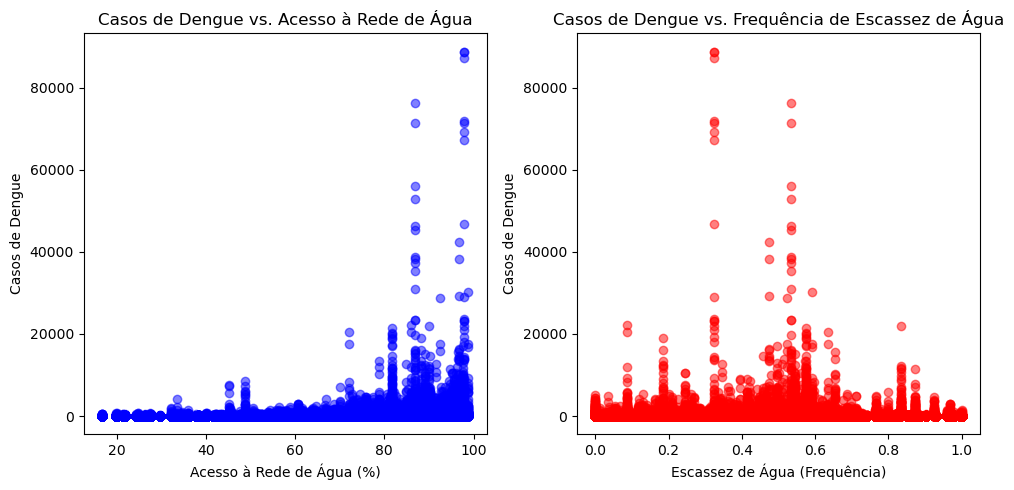

In [41]:
plt.figure(figsize=(10, 5))

# Scatter plot 1: Acesso à rede de água
plt.subplot(1, 2, 1)
plt.scatter(df['water_network'], df['dengue_cases'], color='blue', alpha=0.5)
plt.xlabel('Acesso à Rede de Água (%)')
plt.ylabel('Casos de Dengue')
plt.title('Casos de Dengue vs. Acesso à Rede de Água')

# Scatter plot 2: Frequência de escassez de água
plt.subplot(1, 2, 2)
plt.scatter(df['water_shortage'], df['dengue_cases'], color='red', alpha=0.5)
plt.xlabel('Escassez de Água (Frequência)')
plt.ylabel('Casos de Dengue')
plt.title('Casos de Dengue vs. Frequência de Escassez de Água')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1590/533466607.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_network = df.groupby('water_network_bin')['dengue_cases'].mean().reset_index()
/tmp/ipykernel_1590/533466607.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_shortage = df.groupby('water_shortage_bin')['dengue_cases'].mean().reset_index()


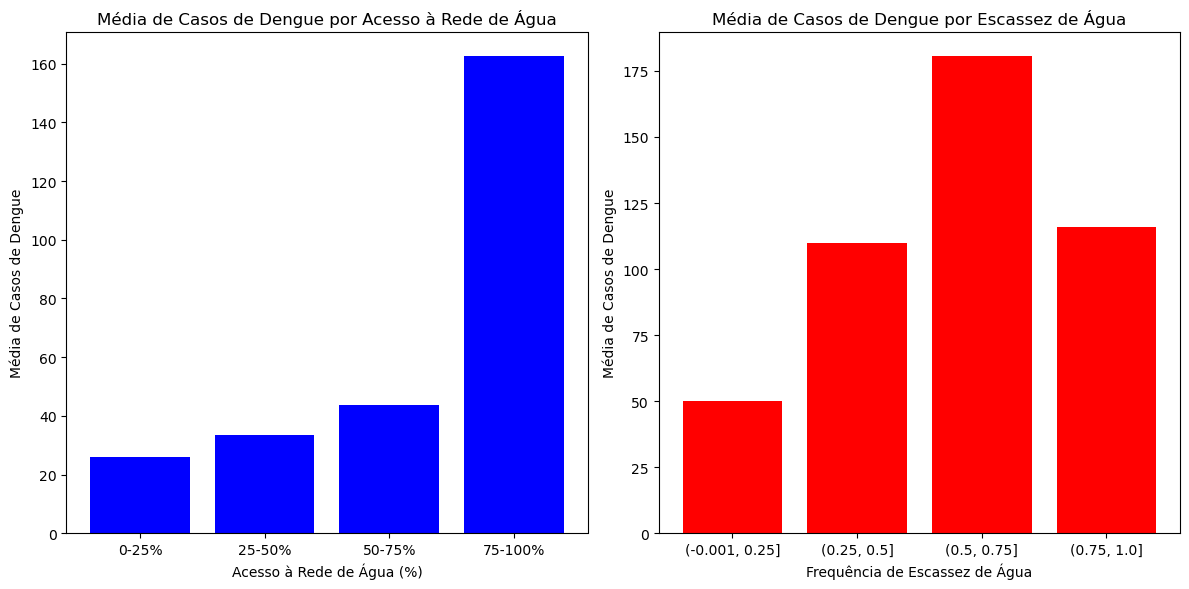

In [42]:
df['water_network_bin'] = pd.cut(df['water_network'], bins=[0, 25, 50, 75, 100], labels=['0-25%', '25-50%', '50-75%', '75-100%'])
df_grouped_network = df.groupby('water_network_bin')['dengue_cases'].mean().reset_index()

# Agrupar por faixas de escassez de água
df['water_shortage_bin'] = pd.cut(df['water_shortage'], bins=4)
df_grouped_shortage = df.groupby('water_shortage_bin')['dengue_cases'].mean().reset_index()

# Plotar os resultados
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Média de casos de dengue por faixa de acesso à água
axes[0].bar(df_grouped_network['water_network_bin'], df_grouped_network['dengue_cases'], color='blue')
axes[0].set_xlabel('Acesso à Rede de Água (%)')
axes[0].set_ylabel('Média de Casos de Dengue')
axes[0].set_title('Média de Casos de Dengue por Acesso à Rede de Água')

# Gráfico 2: Média de casos de dengue por faixa de escassez de água
axes[1].bar(df_grouped_shortage['water_shortage_bin'].astype(str), df_grouped_shortage['dengue_cases'], color='red')
axes[1].set_xlabel('Frequência de Escassez de Água')
axes[1].set_ylabel('Média de Casos de Dengue')
axes[1].set_title('Média de Casos de Dengue por Escassez de Água')

plt.tight_layout()
plt.show()

In [43]:
df['urban_norm'] = df['urban'] / 100  # Já é percentual
df['water_network_norm'] = df['water_network'] / 100  # Já é percentual
df['water_shortage_norm'] = df['water_shortage'] / df['water_shortage'].max()  # Escala para 0-1

# Criando um índice de infraestrutura (maior valor indica melhor infraestrutura)
df['infra_index'] = (df['urban_norm'] + df['water_network_norm'] - df['water_shortage_norm']) / 3

# Classificando as regiões como "boa infraestrutura" e "infraestrutura carente" com base na mediana
df['infra_category'] = pd.cut(df['infra_index'], bins=[-1, df['infra_index'].median(), 1], labels=['Carente', 'Boa'])

# Exibindo algumas linhas para conferir
df[['urban', 'water_network', 'water_shortage', 'infra_index', 'infra_category']].head()

,urban,water_network,water_shortage,infra_index,infra_category
0,85.20,33.57,0.2245,0.321067,Carente
1,72.31,27.43,0.0873,0.303367,Carente
2,66.91,27.76,0.1871,0.253200,Carente
3,68.68,32.23,0.2381,0.257000,Carente
4,42.82,21.40,0.2837,0.119500,Carente


/tmp/ipykernel_1590/2837736468.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_infra = df.groupby('infra_category')['dengue_cases'].mean().reset_index()


  infra_category  dengue_cases
0        Carente     55.822675
1            Boa    146.895256


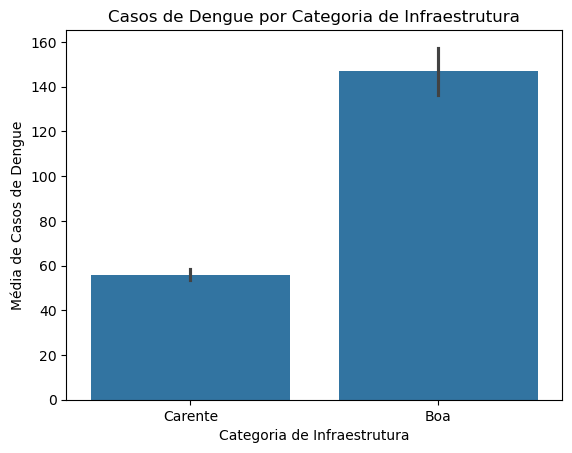

In [64]:
# Calculando a média de casos de dengue por categoria de infraestrutura
df_grouped_infra = df.groupby('infra_category')['dengue_cases'].mean().reset_index()

# Exibindo a média de casos de dengue para cada grupo
print(df_grouped_infra)

# Visualizando os resultados
import seaborn as sns

sns.barplot(x='infra_category', y='dengue_cases', data=df_clean)
plt.xlabel('Categoria de Infraestrutura')
plt.ylabel('Média de Casos de Dengue')
plt.title('Casos de Dengue por Categoria de Infraestrutura')
plt.show()

In [59]:
from scipy.stats import ttest_ind
df_clean = df[['dengue_cases', 'infra_category']].dropna()
# Separando os dados em dois grupos: boa infraestrutura e infraestrutura carente
good_infra = df_clean[df_clean['infra_category'] == 'Boa']['dengue_cases']
poor_infra = df_clean[df_clean['infra_category'] == 'Carente']['dengue_cases']

# Verificando se há NaNs ainda
print(good_infra.isna().sum(), poor_infra.isna().sum())

# Realizando o teste t
t_stat, p_value = ttest_ind(good_infra, poor_infra, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

0 0
T-statistic: 16.742213388885066, P-value: 8.538599727514943e-63


# Análise temporal de sazonalidade

In [66]:
dengue_by_year = df.groupby('year')['dengue_cases'].sum()
dengue_by_month = df.groupby('month')['dengue_cases'].sum()

# Exibir os resultados
# print(dengue_by_year)
# print(dengue_by_month)

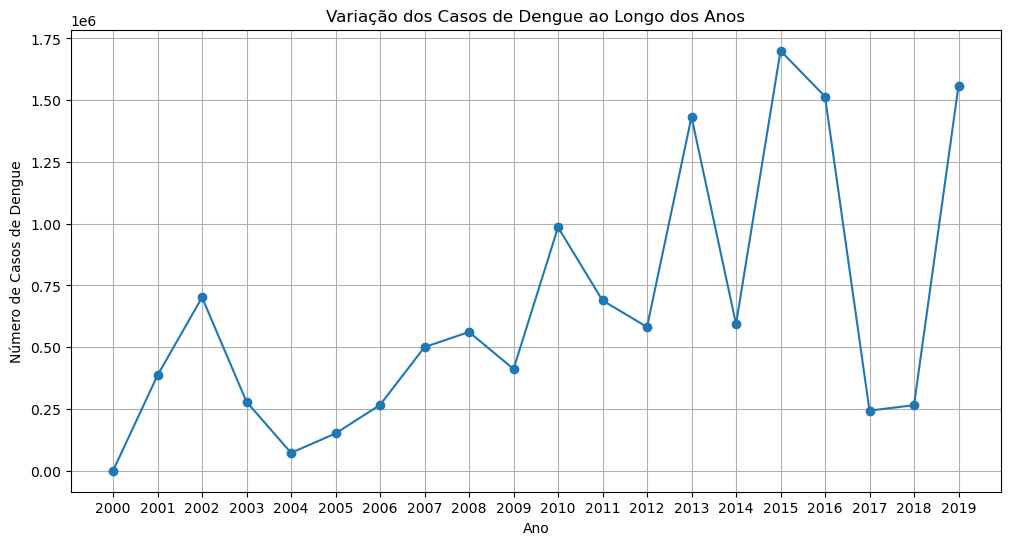

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(dengue_by_year.index, dengue_by_year.values, marker='o')

# Definir os ticks do eixo X como inteiros (anos)
plt.xticks(ticks=dengue_by_year.index.astype(int))  # Garante que os ticks sejam inteiros

plt.title('Variação dos Casos de Dengue ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Casos de Dengue')
plt.grid(True)
plt.show()

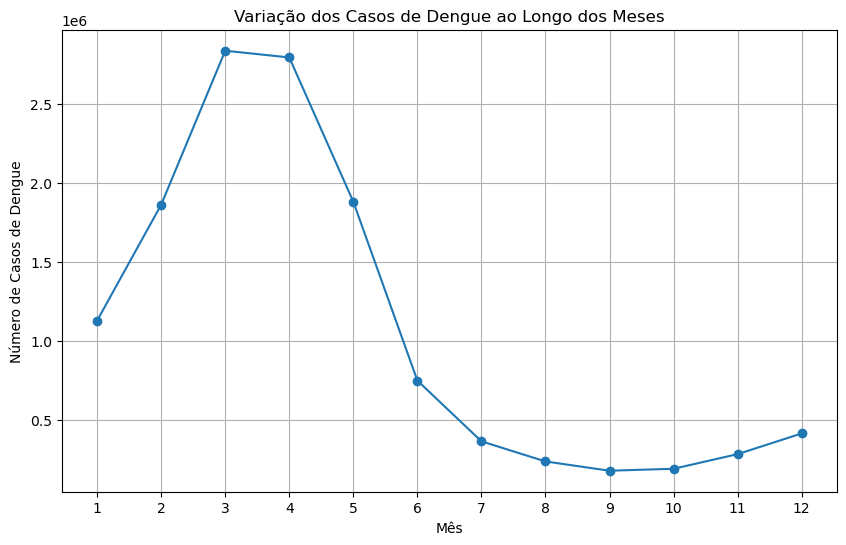

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(dengue_by_month.index, dengue_by_month.values, marker='o')
plt.title('Variação dos Casos de Dengue ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Número de Casos de Dengue')
plt.xticks(range(1, 13))  # Marcadores de 1 a 12 (meses)
plt.grid(True)
plt.show()

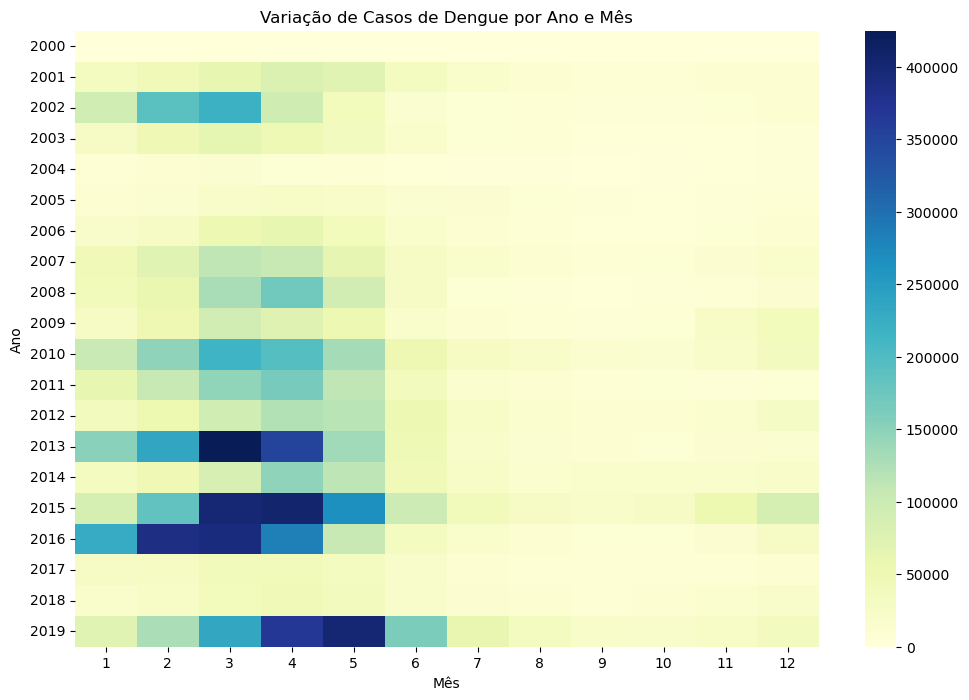

In [70]:
dengue_by_year_month = df.groupby(['year', 'month'])['dengue_cases'].sum().unstack()

# Exibir a tabela de casos de dengue por ano e mês
# print(dengue_by_year_month)

# Plotando como um heatmap (mapa de calor) para visualizar melhor as variações
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(dengue_by_year_month, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Variação de Casos de Dengue por Ano e Mês')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()